In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/The Josephs/Downloads/winequality-red+(1).csv')

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


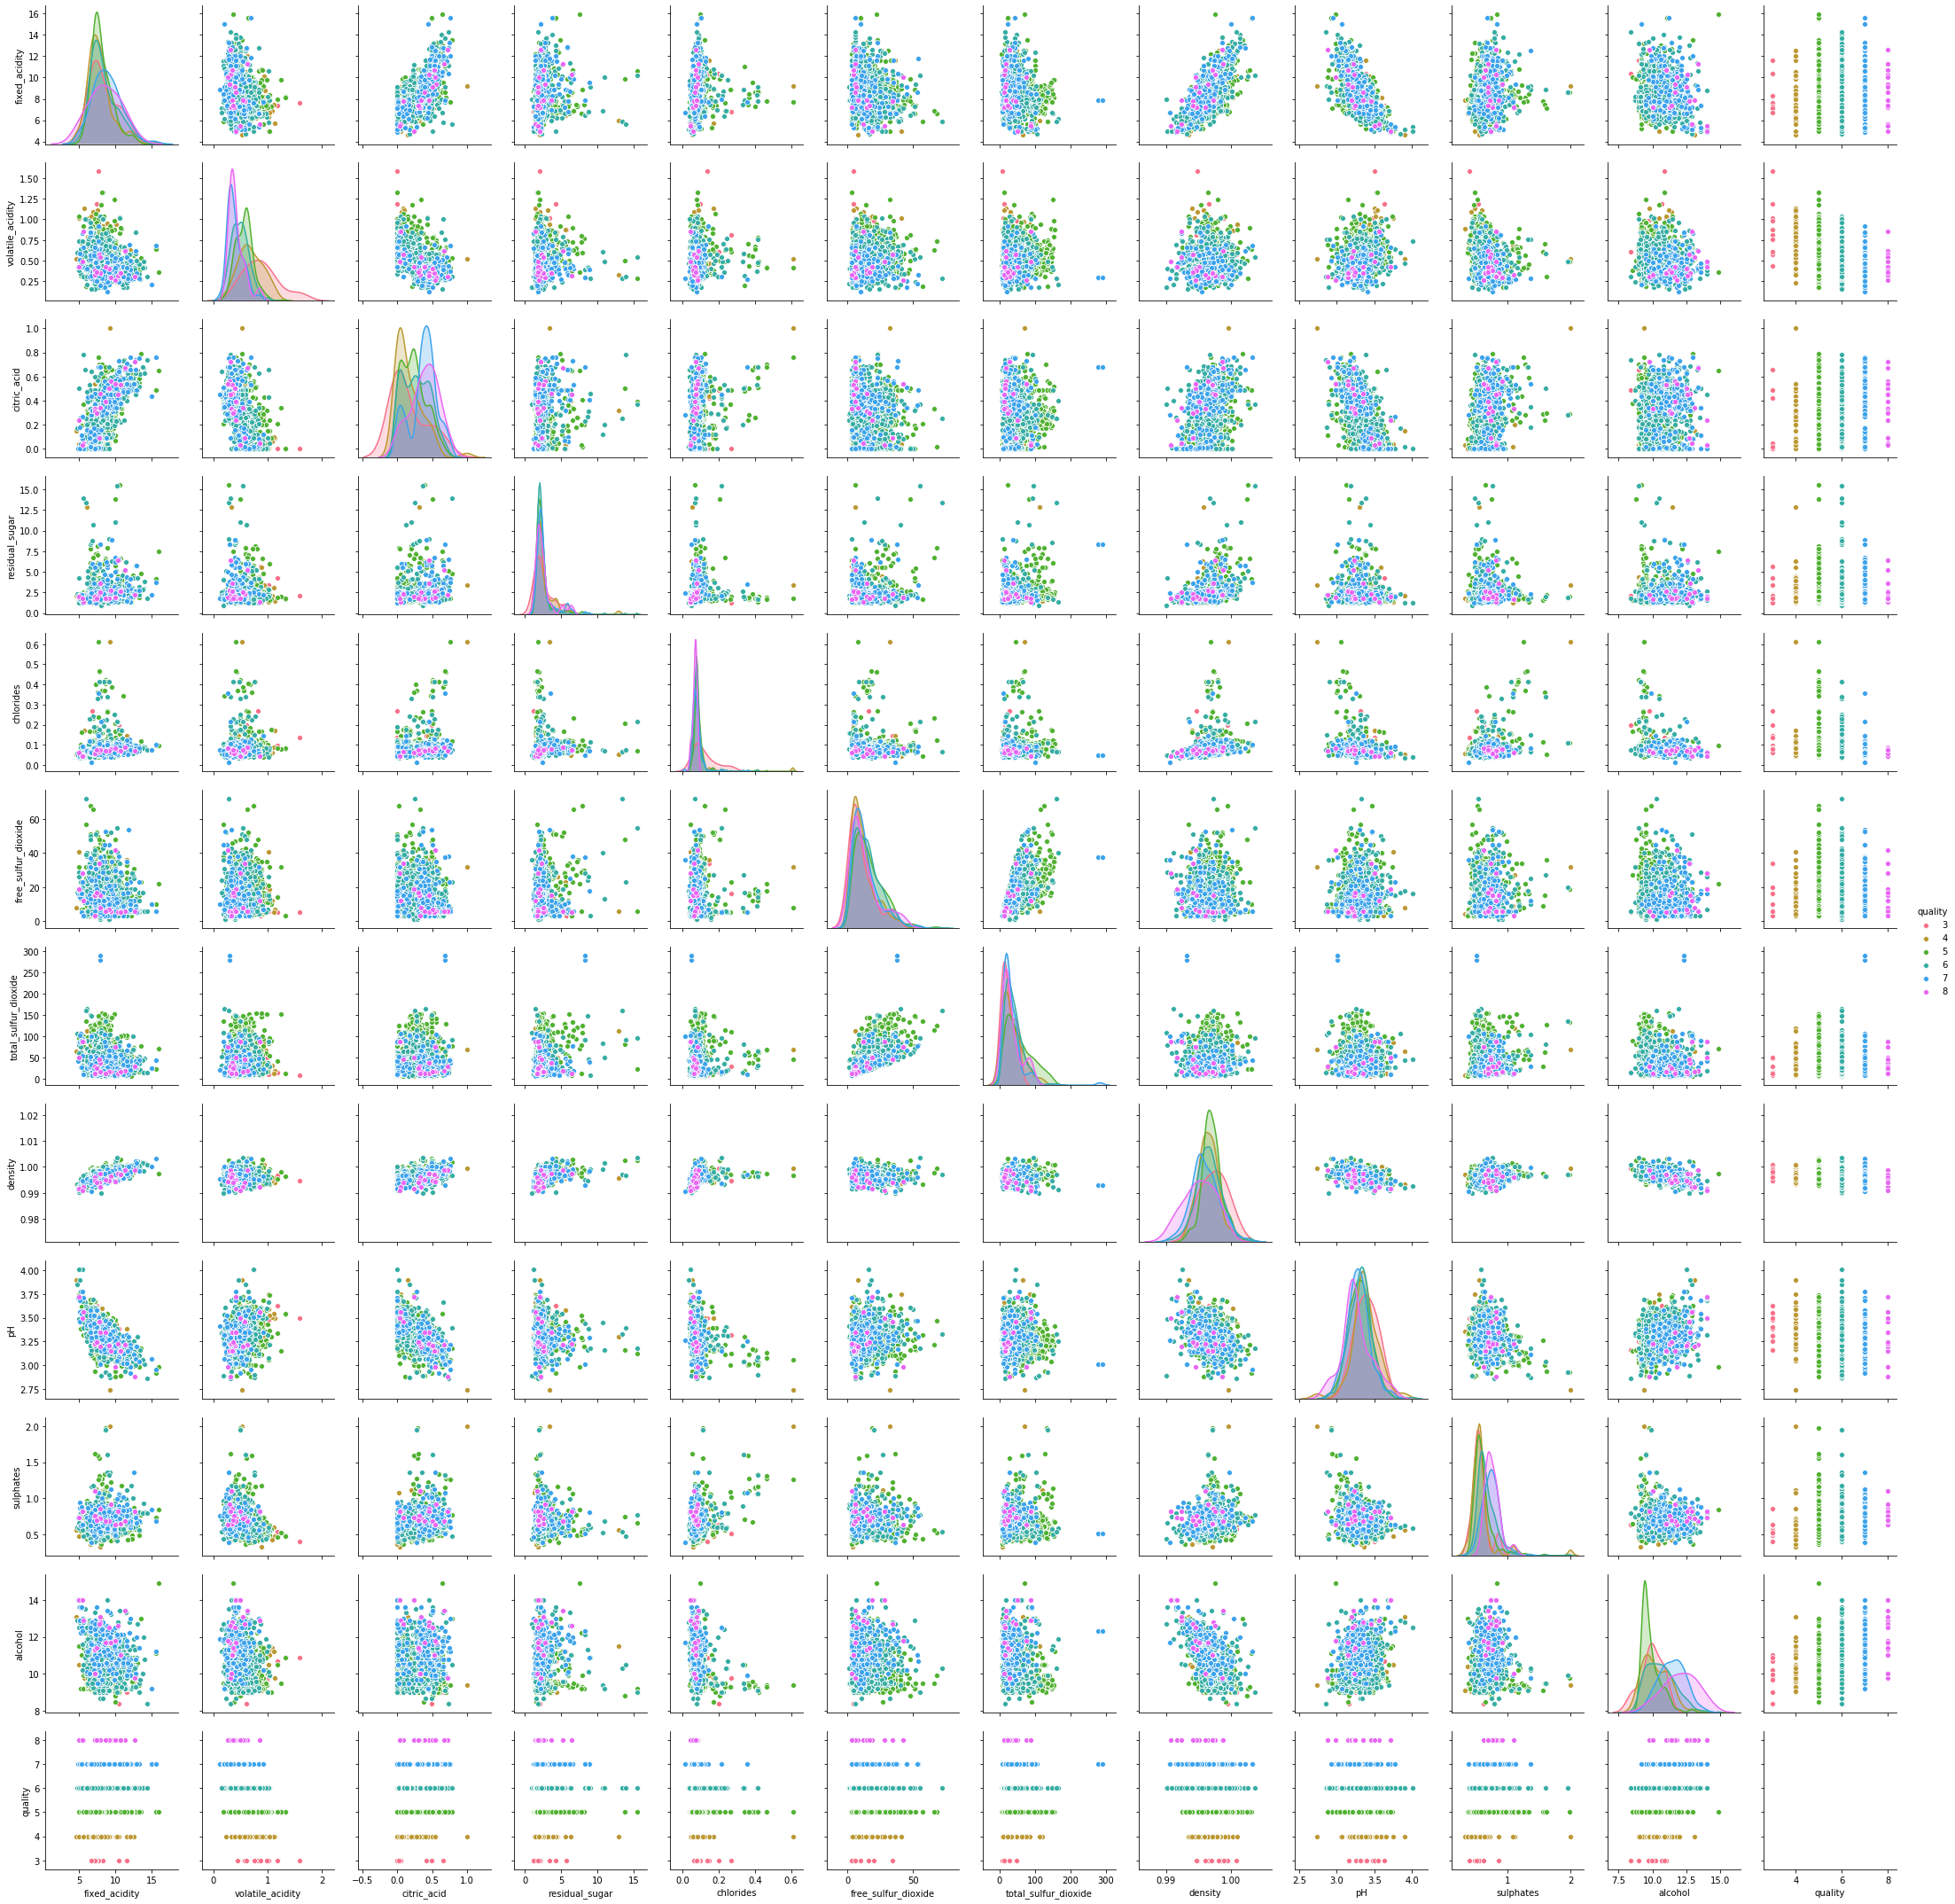

In [8]:
sns.pairplot(df,hue='quality',palette='husl')
plt.show()

In [9]:
df_x=df.drop('quality',axis=1)
df_x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
# standardising the data
from scipy.stats import zscore
df_scaled = df_x.apply(zscore) # The continuous features become identical in terms of the range, after a scaling process.
df_scaled.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [11]:
df['quality'].value_counts() # the original y feature has 6 classes.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

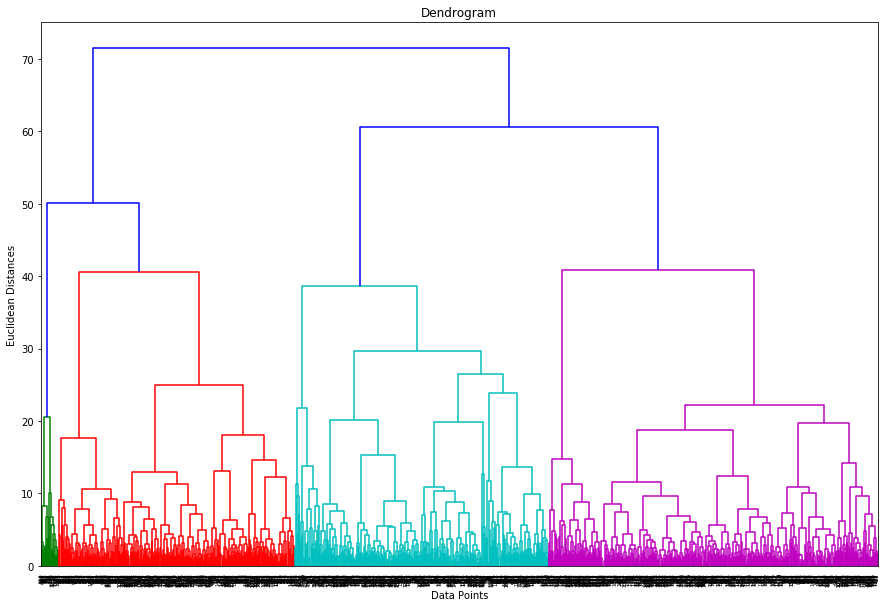

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [3]])

In [13]:
#Creating the dendogram
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

plt.figure(figsize=[15,10])
merg = linkage(df_scaled, method='ward')
dendrogram(merg, leaf_rotation=90)

# labelling the axis
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# reducing to 6 clusters
cut_tree(merg,n_clusters=6)


In [21]:
from sklearn.cluster import AgglomerativeClustering

h_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
cluster2 = h_cluster.fit_predict(df_scaled) # predicting the classes

df_h = df_scaled.copy(deep=True)
df_h['label'] = cluster2 # creating new column named 'label' adding predicted class feature


In [26]:
# for whole data set;
print('original class count:\n',df['quality'].value_counts(),'\n')
print('agglomerative class count:\n',df_h['label'].value_counts())

original class count:
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

agglomerative class count:
 1    530
0    485
2    327
5    125
4     99
3     33
Name: label, dtype: int64


# Agglomerative clustering using  selected features:

### features: 'fixed_acidity' and 'volatile_acidity' :

In [27]:
# for selected feature:

A=df_scaled[['fixed_acidity','volatile_acidity']]
A.head()



,fixed_acidity,volatile_acidity
0,-0.528360,0.961877
1,-0.298547,1.967442
2,-0.298547,1.297065
3,1.654856,-1.384443
4,-0.528360,0.961877


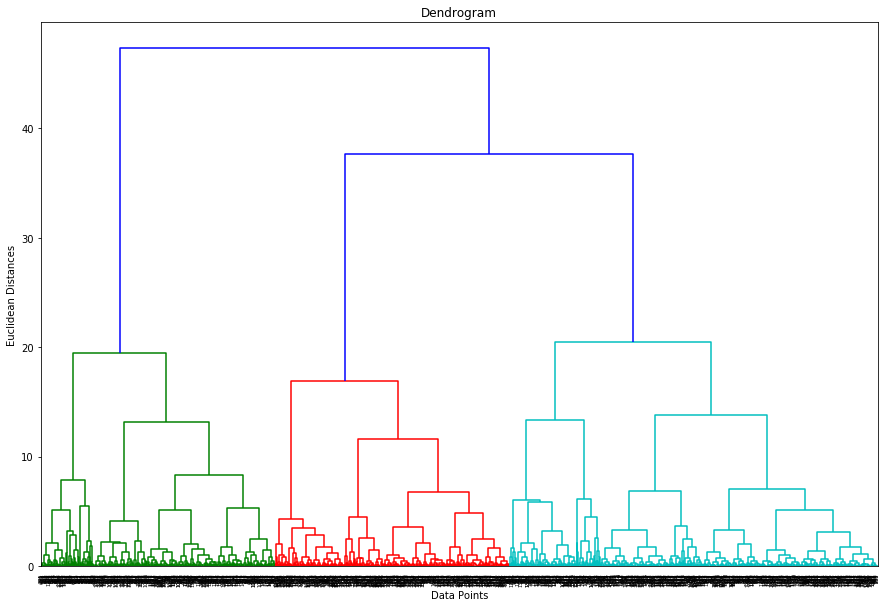

array([[0],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [28]:
#Creating the dendogram
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

plt.figure(figsize=[15,10])
merg = linkage(A, method='ward')
dendrogram(merg, leaf_rotation=90)

# labelling the axis
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# reducing to 6 clusters
cut_tree(merg,n_clusters=6)


In [53]:
h_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
cluster = h_cluster.fit_predict(A) # predicting the classes

df_A = df_scaled.copy(deep=True)
df_A['label'] = cluster # creating new column named 'label' adding predicted class feature


In [54]:
# for whole data set;
print('original class count:\n',df['quality'].value_counts(),'\n')
print('agglomerative class count:\n',df_A['label'].value_counts())

original class count:
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

agglomerative class count:
 0    530
2    345
3    316
1    174
5    131
4    103
Name: label, dtype: int64


In [55]:
pd.crosstab(df['quality'],df_A['label'])

label,0,1,2,3,4,5
quality,,,,,,
3,3,4,2,0,1,0
4,18,18,4,10,3,0
5,285,103,116,127,31,19
6,194,46,150,140,47,61
7,27,3,67,34,19,49
8,3,0,6,5,2,2


### features: 'citric_acid' and 'fixed_acidity'

In [32]:
B=df_scaled[['citric_acid','fixed_acidity']]
B.head()

,citric_acid,fixed_acidity
0,-1.391472,-0.528360
1,-1.391472,-0.298547
2,-1.186070,-0.298547
3,1.484154,1.654856
4,-1.391472,-0.528360


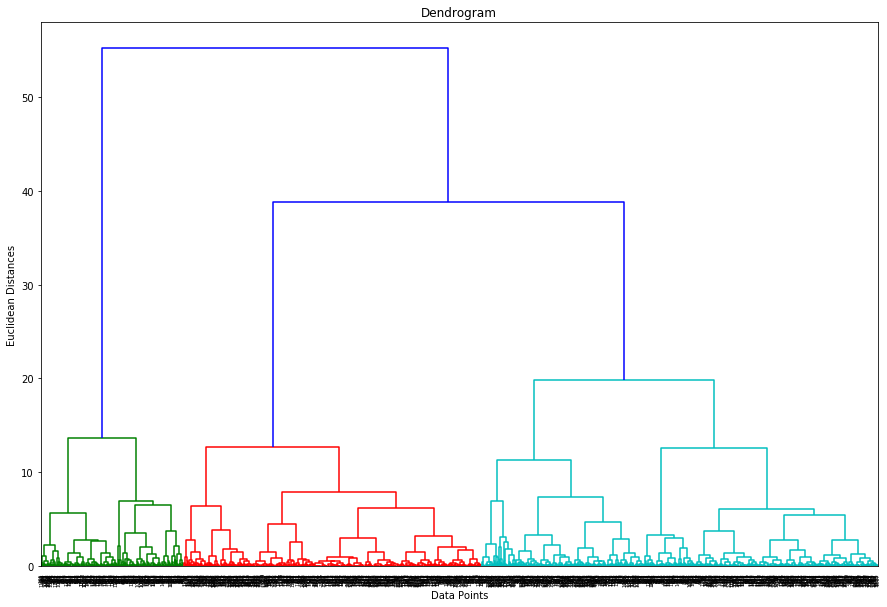

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [4]])

In [33]:
#Creating the dendogram
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

plt.figure(figsize=[15,10])
merg = linkage(B, method='ward')
dendrogram(merg, leaf_rotation=90)

# labelling the axis
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# reducing to 6 clusters
cut_tree(merg,n_clusters=6)


In [34]:
h_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
cluster = h_cluster.fit_predict(B) # predicting the classes

df_B = df_scaled.copy(deep=True)
df_B['label'] = cluster # creating new column named 'label' adding predicted class feature


In [35]:
# for whole data set;
print('original class count:\n',df['quality'].value_counts(),'\n')
print('agglomerative class count:\n',df_B['label'].value_counts())

original class count:
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

agglomerative class count:
 0    446
3    439
1    311
4    147
5    130
2    126
Name: label, dtype: int64


In [36]:
pd.crosstab(df['quality'],df_B['label'])

label,0,1,2,3,4,5
quality,,,,,,
3,0,0,1,7,2,0
4,11,6,3,26,1,6
5,235,112,36,209,40,49
6,171,116,60,171,66,54
7,25,74,24,25,33,18
8,4,3,2,1,5,3


### features: 'residual_sugar' and'sulphates'

In [37]:
C=df_scaled[['residual_sugar','sulphates']]
C

,residual_sugar,sulphates
0,-0.453218,-0.579207
1,0.043416,0.128950
2,-0.169427,-0.048089
3,-0.453218,-0.461180
4,-0.453218,-0.579207
...,...,...
1594,-0.382271,-0.461180
1595,-0.240375,0.601055
1596,-0.169427,0.542042
1597,-0.382271,0.305990


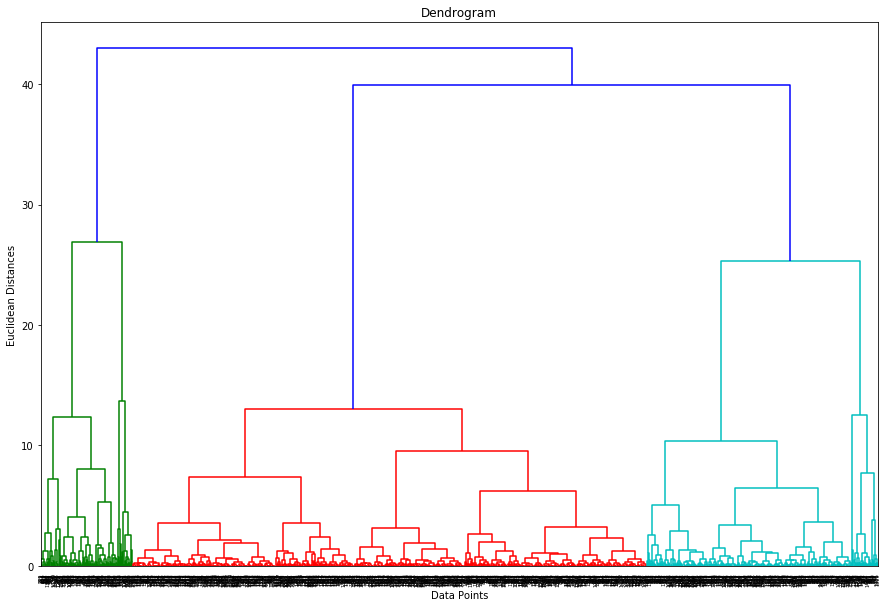

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [2]])

In [38]:
#Creating the dendogram
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

plt.figure(figsize=[15,10])
merg = linkage(C, method='ward')
dendrogram(merg, leaf_rotation=90)

# labelling the axis
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# reducing to 6 clusters
cut_tree(merg,n_clusters=6)


In [39]:
h_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
cluster = h_cluster.fit_predict(C) # predicting the classes

df_C = df_scaled.copy(deep=True)
df_C['label'] = cluster # creating new column named 'label' adding predicted class feature


In [40]:
# for whole data set;
print('original class count:\n',df['quality'].value_counts(),'\n')
print('agglomerative class count:\n',df_C['label'].value_counts())

original class count:
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

agglomerative class count:
 0    983
4    391
3    147
1     50
2     20
5      8
Name: label, dtype: int64


In [41]:
pd.crosstab(df['quality'],df_C['label'])

label,0,1,2,3,4,5
quality,,,,,,
3,7,0,0,2,1,0
4,37,3,0,10,2,1
5,501,25,9,63,80,3
6,382,14,8,38,192,4
7,50,7,3,32,107,0
8,6,1,0,2,9,0


### features: 'free_sulfur_dioxide' and 'total_sulfur_dioxide' :

In [42]:
D=df_scaled[['free_sulfur_dioxide','total_sulfur_dioxide']]
D

,free_sulfur_dioxide,total_sulfur_dioxide
0,-0.466193,-0.379133
1,0.872638,0.624363
2,-0.083669,0.229047
3,0.107592,0.411500
4,-0.466193,-0.379133
...,...,...
1594,1.542054,-0.075043
1595,2.211469,0.137820
1596,1.255161,-0.196679
1597,1.542054,-0.075043


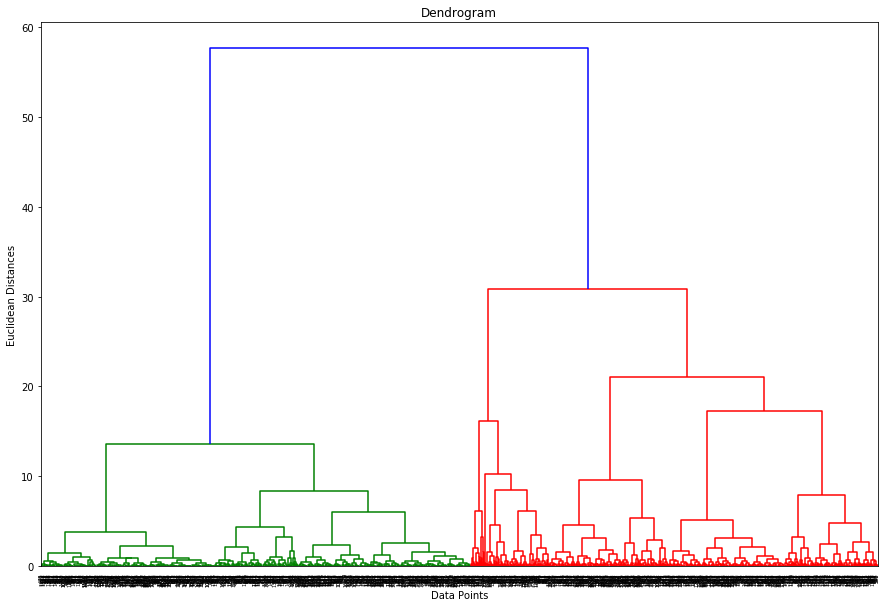

array([[0],
       [1],
       [2],
       ...,
       [1],
       [1],
       [5]])

In [43]:
#Creating the dendogram
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

plt.figure(figsize=[15,10])
merg = linkage(D, method='ward')
dendrogram(merg, leaf_rotation=90)

# labelling the axis
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# reducing to 6 clusters
cut_tree(merg,n_clusters=6)


In [44]:
h_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
cluster = h_cluster.fit_predict(D) # predicting the classes

df_D = df_scaled.copy(deep=True)
df_D['label'] = cluster # creating new column named 'label' adding predicted class feature


In [45]:
# for whole data set;
print('original class count:\n',df['quality'].value_counts(),'\n')
print('agglomerative class count:\n',df_D['label'].value_counts())

original class count:
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

agglomerative class count:
 0    822
3    229
4    221
2    178
1    123
5     26
Name: label, dtype: int64


In [46]:
pd.crosstab(df['quality'],df_D['label'])

label,0,1,2,3,4,5
quality,,,,,,
3,8,0,0,1,1,0
4,34,1,7,6,5,0
5,298,95,114,84,74,16
6,339,21,49,110,112,7
7,132,5,7,26,26,3
8,11,1,1,2,3,0


### features: fixed_acidity','citric_acid' and'volatile_acidity':

In [47]:
E=df_scaled[['fixed_acidity','citric_acid','volatile_acidity']]
E

,fixed_acidity,citric_acid,volatile_acidity
0,-0.528360,-1.391472,0.961877
1,-0.298547,-1.391472,1.967442
2,-0.298547,-1.186070,1.297065
3,1.654856,1.484154,-1.384443
4,-0.528360,-1.391472,0.961877
...,...,...,...
1594,-1.217796,-0.980669,0.403229
1595,-1.390155,-0.877968,0.123905
1596,-1.160343,-0.723916,-0.099554
1597,-1.390155,-0.775267,0.654620


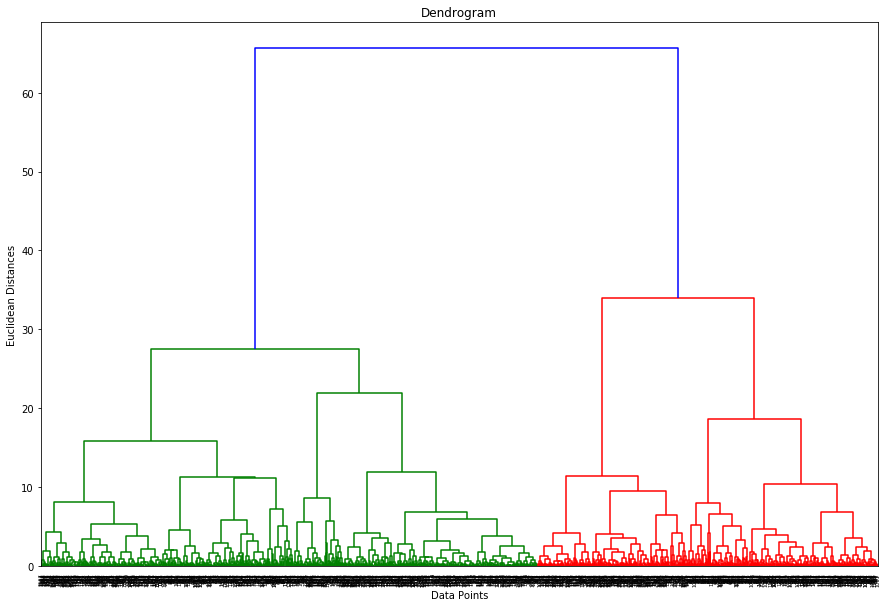

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [4]])

In [48]:
#Creating the dendogram
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

plt.figure(figsize=[15,10])
merg = linkage(E, method='ward')
dendrogram(merg, leaf_rotation=90)

# labelling the axis
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# reducing to 6 clusters
cut_tree(merg,n_clusters=6)


In [50]:
h_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
cluster = h_cluster.fit_predict(E) # predicting the classes

df_E = df_scaled.copy(deep=True)
df_E['label'] = cluster # creating new column named 'label' adding predicted class feature


In [51]:
# for whole data set;
print('original class count:\n',df['quality'].value_counts(),'\n')
print('agglomerative class count:\n',df_E['label'].value_counts())

original class count:
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

agglomerative class count:
 0    481
1    370
2    287
3    247
5    116
4     98
Name: label, dtype: int64


In [52]:
pd.crosstab(df['quality'],df_E['label'])

label,0,1,2,3,4,5
quality,,,,,,
3,0,0,0,2,7,1
4,10,15,6,4,16,2
5,288,161,84,67,45,36
6,172,156,127,110,24,49
7,10,35,66,57,5,26
8,1,3,4,7,1,2
